In [0]:
import matplotlib.pyplot as plt
import re
import io
import numpy as np
import scipy.stats as sc
# -*- coding: utf8 -*-

### Histogram

In [0]:
UKRAINIAN_LETTER_FREQUENCES = {'а': 0.074, 'б': 0.018, 'в': 0.054, 'г': 0.016, 'д': 0.036, 'е': 0.017, 'є': 0.008, 'ж': 0.009, 'з': 0.024, 'и': 0.063, 'і': 0.059,
                               'ї': 0.006, 'й': 0.009, 'к': 0.036, 'л': 0.037, 'м': 0.032, 'н': 0.067, 'о': 0.097, 'п': 0.023, 'р': 0.049, 'с': 0.042, 'т': 0.057,
                               'у': 0.041, 'ф': 0.001, 'х': 0.012, 'ц': 0.006, 'ч': 0.019, 'ш': 0.012, 'щ': 0.001, 'ю': 0.004, 'я': 0.030, 'ь': 0.030, 'ґ': 0.001}


In [0]:
def prepare_data(file):

    with io.open(file, encoding='utf-8') as f:
        list_of_words = re.findall(r'\w+', f.read().lower())

    return list_of_words

In [0]:
def calculate_frequences(text):
    data = ''.join([ind[1] for ind in sorted([(ord(item), item) for item in ''.join(text) if item.isalpha()])])

    letter_from_text = {}
    for letter in data:
        if letter not in letter_from_text.keys():
            letter_from_text[letter] = 1
        else:
            letter_from_text[letter] += 1

    for letter in letter_from_text.keys():
        letter_from_text[letter] /= len(data)

    res = [(key, letter_from_text[key]) for key in letter_from_text.keys()]

    val = 0

    for _ in letter_from_text.values():
        val += _
    # print(val)

    return res

In [0]:
def plot_figure(data):

    names = [pair[0] for pair in data]
    values = [pair[1] for pair in data]
    off_names = [key for key in UKRAINIAN_LETTER_FREQUENCES.keys()]
    off_values = [value for value in UKRAINIAN_LETTER_FREQUENCES.values()]

    plt.bar(names, values, color='g', label='experimental data')
    plt.bar(off_names, off_values, color='r', width=0.3, label='official data')
    plt.title('Histogram of frequencies of occurrence of letters in the text')
    plt.legend()
    plt.show()

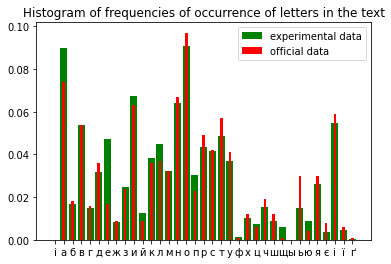

In [112]:
  data = prepare_data("Ykysognyanogozmiya_1411394145.txt")
  freq = calculate_frequences(data)
  plot_figure(freq)

## Vigenere encryption algorithm

In [0]:
alphabet = ["а", "б", "в", "г", "ґ", "д", "е", "є", "ж", "з", "и", "і", "ї", "й", "к", "л", "м",
            "н", "о", "п", "р", "с", "т", "у", "ф", "х", "ц", "ч", "ш", "щ", "ь", "ю", "я"]

In [0]:
def encrypt(text, key):
    entext = ''.join(re.findall(r'\w+', text.lower()))
    new_key = ''
    for _ in entext:
        if len(entext) % len(key) == 0:
            new_key = key * int(len(entext) / len(key))
        else:
            new_key = (key * int(len(entext) / len(key) + 1))[:len(entext)]

    new_index = dict([(alphabet[i], i) for i in range(len(alphabet))])

    word_index = [new_index.get(letter) for letter in entext]
    key_index = [new_index.get(letter) for letter in new_key]

    encrypt_index = [divmod(int(word_index[i]) + int(key_index[i]), 33)[1] for i in range(len(word_index))]

    encrypt_text = ''.join([list(new_index.items())[index][0] for index in encrypt_index])
    return encrypt_text

In [0]:
def decrypt(text, key):
    entext = text.replace(' ', '')
    new_key = ''
    for _ in entext:
        if len(entext) % len(key) == 0:
            new_key = key * int(len(entext) / len(key))
        else:
            new_key = (key * int(len(entext) / len(key) + 1))[:len(entext)]

    new_index = dict([(alphabet[i], i) for i in range(len(alphabet))])

    word_index = [new_index.get(letter) for letter in entext]
    key_index = [new_index.get(letter) for letter in new_key]

    encrypt_index = [divmod(int(word_index[i]) - int(key_index[i]), 33)[1] for i in range(len(word_index))]

    decrypted = ''.join([list(new_index.items())[index][0] for index in encrypt_index])
    return decrypted

In [14]:
key = "нехай"
text = "Сивочолий чернець Нестор, схилившись над столом, пише історію свого народу. Цей епізод, увічнений у мармурі,красномовне свідчення того, що люди здавна прагнули зберегти інформацію для своїх нащадків."
encrypted = encrypt(text, key)
encrypted

'дмчоєвсвйєуцзеекуюсввцйхуямчшудгзаодшилюахвшпшчкоашґйвюрфзаавілцпьїіітвілвфіуюнуьщжааащїічґейнюафчнпджгдєуузяввзищюяґьиттечнйгцхгьєсвзкуцюгвчнзфюґтхцфлієябпфґхьнвхдчшж'

In [16]:
decrypted = decrypt(encrypted, key)
decrypted

'сивочолийчернецьнесторсхилившисьнадстоломпишеісторіюсвогонародуцейепізодувічненийумармурікрасномовнесвідченнятогощолюдиздавнапрагнулизберегтиінформаціюдлясвоїхнащадків'

## Vigenere cipher analysis

In [0]:
def lenkey(encoded_text):

    ind = 0.04971393836468252
    len_key = 0
    coincidences_dict = {}  # dictionary {key length: index of coincidence}
    for k in range(1, 33):  # size of key
        cur = ''.join([encoded_text[i] for i in range(k, len(encoded_text), k)])  # string generation (each k-th char)
        coincidences_dict[k] = _index_of_coincidence(cur)


    tmp_min = (coincidences_dict[1] - ind) ** 2
    # print(len(coincidences_dict))
    for ci in coincidences_dict.keys():
        cur_min = (coincidences_dict[ci] - ind)**2
        if cur_min < tmp_min:
            tmp_min = cur_min
            len_key = ci

    key = ''

    xi_value_text = xi_value(encoded_text)
    for start in range(len_key):
        subset = ''.join([encoded_text[j] for j in range(start, len(encoded_text), len_key)])
        cur_letter = ''
        for letter in alphabet:
            dec_text = decrypt(subset, letter)
            sub_xi_value = xi_value(dec_text)
            if sub_xi_value < xi_value_text:
                xi_value_text = sub_xi_value
                cur_letter = letter
                # print(cur_letter)
        key += cur_letter
    print(key)
    print(decrypt(encoded_text, key))

In [109]:
text_data = ''.join(data)[:200]
encrypted_text = encrypt(text_data, key)
key

'нехай'

In [74]:
print(encrypted_text)
print(decrypt(encrypted_text, key))

єрлсюруфнюрфбмфмшвсюпчткйбекашмжйебпнкнроцхтбежимйяфелюгфкашвчттйаеєоьнжгтишлчаснсинйпчфкфбеоіюбеєььшфьмфбмкидюцхїлтїірюощчашвчкавчшчеатфунюрфуспґзгйржцюмюпцизошсіеаїмдтаччкаавргвввтлкюямчащбейтггуигю
укусогняногозміятисовськанаталявсесвітнєбратствомалоклопоталосьтамалонавітьізважалонавсякінаціональніодмінитихкраївдепробувалостатитвердоюногоюсергійєфремоврозділпершийтристароківтомуколивамнаступного


In [110]:
lenkey(encoded_text=encrypted_text)

ееяцйй
бкмшоєноодєішихултлхрбзбєшєсрливкйсеіжочдйпмвйшьиєаюцвхьхсрлщсущарабпґґшьміввкчлошьґєйшюбішапоосабюґліфихжгбґяяаїязмйоєоїушєлтсжбзклсабщіиіхсюижйюииаєвряуоерґихлждабпгхмчшббрчщситтщммсописбгсцємґииььх
